# xử lí ảnh

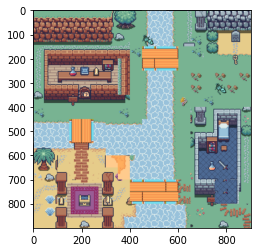

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('assets/map3.png')[:,:,::-1]
plt.imshow(img);

In [7]:
import numpy as np
sp = np.array(img.shape)[:-1]
sp

array([400, 265])

In [33]:
status = []
for i in range(4):
    status.append(img[96*i:96*(i+1)])

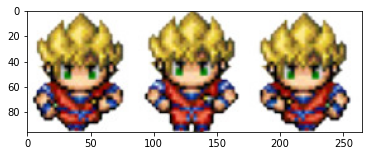

In [37]:
plt.imshow(status[0]);

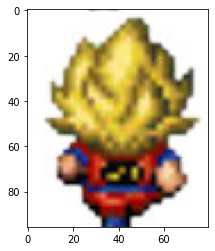

In [57]:
plt.imshow(status[3][:, :80]);

In [58]:
for i in range(3):
    b = i*90
    e = b+80
    img =status[3][:, b:e]
    cv2.imwrite(f'up{i}.png', img[:,:,::-1])

# Xử lí dữ liệu

(900, 900, 3)


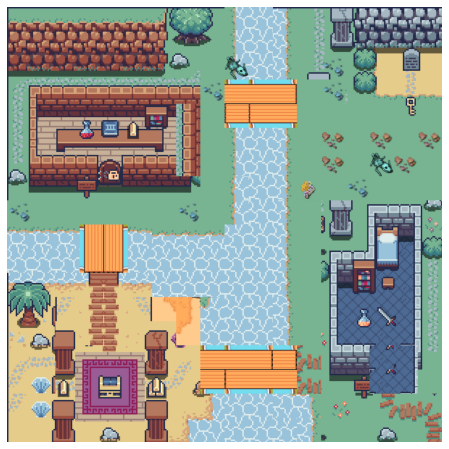

In [30]:
img = cv2.imread('assets/map3.png')[:,:,::-1]
plt.figure(figsize = (19, 8))
plt.axis('off')
print(img.shape)
plt.imshow(img);

In [23]:
import numpy as np
f = open('map/map3.csv', 'r')
data = np.array([i.split(',') for i in f.readlines()]).astype(int).T
data

array([[-1, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,
         0,  0],
       [-1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,
         0,  0],
       [-1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,  0,
         0, -1],
       [-1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [-1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
         0,  0],
       [-1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,
         0,  0],
       [-1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  0,
        -1, -1],
       [-1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,
         0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,
        -1, -1],
       [-1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,
        -1, -1],
       [-1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,
        -1, -1],
       [-1, -1, -1,  

In [29]:
data.shape

(18, 18)

In [31]:
900/18

50.0

In [32]:
np.where(data == 1)

(array([8], dtype=int64), array([1], dtype=int64))

# Xử lí thuật toán

In [1]:
import numpy as np
from search_way import Search

data = []
for i in range(1, 8):
    f = open(f'map/Map{i}.csv', 'r')
    data.append(np.array([i.split(',') for i in f.readlines()]).astype(int))
    # dt = np.array([i.split(',') for i in f.readlines()]).astype(int)
    print(f'map {i}',np.unique(data[-1]))

map 1 [-1  0  1  2]
map 2 [-1  0  1  2]
map 3 [-1  0  1  2  3]
map 4 [-1  0  1  2]
map 5 [-1  0  1  2]
map 6 [-1  0  1  2]
map 7 [-1  0  1  2]


In [2]:
for i in data:
    print(i.shape)

(18, 18)
(18, 18)
(18, 18)
(18, 18)
(18, 18)
(18, 18)
(18, 18)


In [6]:
def calc(s, g, barrier):
    o = Search(18, 18, barrier) # khởi tạo thuật toán
    x = o.runAll(s, g) # chạy tất cả thuật toán
    alg = [i[1]+len(i[2]) for i in x] # lấy giá trị để so sánh
    id = alg.index(min(alg)) # lấy chỉ số có giá trị min
    return x[id]

def get_pos(data, num):
    p = np.where(data==num)
    return p[1][0], p[0][0]

m = 4
s = get_pos(data[m], 1)
g = get_pos(data[m], 2)

for i in range(1, 4):
    print('map: ', i)
    barrier = list(zip(*np.where(data[m] == -1)))
    o = Search(18, 18, barrier)
    df = o.viewInfo(s, g)
    df['Total'] = df['Time (ms)']+df['Number of Steps']
    print(df)


map:  1
     Name   Time (ms)  Number of Steps       Total
0     BFS  198.665142               15  213.665142
1     DFS    1.002789               71   72.002789
2     IDS  101.868153               45  146.868153
3  GREEDY    0.000000               19   19.000000
4      A*    3.987551               15   18.987551
map:  2
     Name   Time (ms)  Number of Steps       Total
0     BFS  161.973476               15  176.973476
1     DFS    1.283646               71   72.283646
2     IDS   96.827507               45  141.827507
3  GREEDY    0.996113               19   19.996113
4      A*    3.762960               15   18.762960
map:  3
     Name   Time (ms)  Number of Steps       Total
0     BFS  209.515572               15  224.515572
1     DFS    0.998259               71   71.998259
2     IDS   91.403008               45  136.403008
3  GREEDY    0.000000               19   19.000000
4      A*    4.563808               15   19.563808


In [61]:
import pandas as pd
d = o.runAll(s, g)
name = [d[i][0] for i in range(5)]
time = [d[i][1] for i in range(5)]
number_of_steps = [len(d[i][2]) for i in range(5)]
df = pd.DataFrame({'Name': name, 'Time (ms)': time, 'Number of Steps': number_of_steps})
df['Total'] = df['Time (ms)']+df['Number of Steps']
df


,Name,Time (ms),Number of Steps,Total
0,BFS,241.181612,15,256.181612
1,DFS,3.739834,71,74.739834
2,IDS,123.060703,45,168.060703
3,GREEDY,0.997782,19,19.997782
4,A*,4.498482,15,19.498482


In [58]:
calc(s, g, barrier)

['A*',
 4.988908767700195,
 [(7, 6),
  (8, 6),
  (8, 5),
  (9, 5),
  (10, 5),
  (11, 5),
  (12, 5),
  (13, 5),
  (13, 6),
  (13, 7),
  (13, 8),
  (13, 9),
  (13, 10),
  (13, 11),
  (12, 11)]]

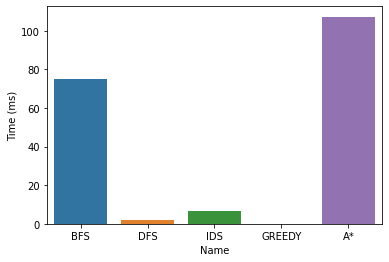

In [15]:
import seaborn as sns
sns.barplot(data = df, x = 'Name', y='Time (ms)');

In [21]:
x = o.runAll(s, g)
x

[['BFS',
  66.18452072143555,
  [(0, 0),
   (0, 1),
   (0, 2),
   (0, 3),
   (0, 4),
   (0, 5),
   (0, 6),
   (0, 7),
   (0, 8),
   (1, 8),
   (2, 8),
   (3, 8),
   (4, 8),
   (5, 8)]],
 ['DFS',
  0.0,
  [(0, 0),
   (1, 0),
   (2, 0),
   (3, 0),
   (4, 0),
   (5, 0),
   (6, 0),
   (7, 0),
   (8, 0),
   (9, 0),
   (9, 1),
   (8, 1),
   (7, 1),
   (6, 1),
   (5, 1),
   (4, 1),
   (3, 1),
   (2, 1),
   (1, 1),
   (0, 1),
   (0, 2),
   (1, 2),
   (2, 2),
   (3, 2),
   (4, 2),
   (5, 2),
   (6, 2),
   (7, 2),
   (8, 2),
   (9, 2),
   (9, 3),
   (8, 3),
   (7, 3),
   (6, 3),
   (5, 3),
   (4, 3),
   (3, 3),
   (2, 3),
   (1, 3),
   (0, 3),
   (0, 4),
   (1, 4),
   (2, 4),
   (3, 4),
   (4, 4),
   (5, 4),
   (6, 4),
   (7, 4),
   (8, 4),
   (9, 4),
   (9, 5),
   (8, 5),
   (7, 5),
   (6, 5),
   (5, 5),
   (4, 5),
   (3, 5),
   (2, 5),
   (1, 5),
   (0, 5),
   (0, 6),
   (1, 6),
   (2, 6),
   (3, 6),
   (4, 6),
   (5, 6),
   (6, 6),
   (7, 6),
   (8, 6),
   (9, 6),
   (9, 7),
   (8, 7),
   (7,

# hiệu ứng di chuyển

In [41]:
def constrain(x, y, x_, y_, bar):
    if (x_, y_) in bar:
        return x, y
    return x_, y_

a = (1, 1)
b = (2, 1)
bar = [(3, 1)]
constrain(a[0], a[1], b[0], b[1], bar)

(2, 1)

In [ ]:
a = (0, 0)
b = (5, 0)
def go(a, b):
    x, y = a
    x_, y_ = b
    if x_ > x:
        way = np.vstack((np.arange(x, x_, 1), np.array([y]*5))).T
        type = 'R'
        return type, way

In [84]:
np.vstack((np.arange(0, 5, 1), np.array([0]*5))).T

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0]])

In [88]:
a = [1, 3, 4]
b = f'a'
print(f'{b[0]}')

a


In [1]:
63+13+18+10+84+43+10

241

In [2]:
241/2

120.5